# Lesson 1: The Python language

## Mini-quiz 1: Fix the mistake!

In [2]:
E = 68.1289790
px = -17.945541
py = 13.1652603
pz = 64.3908386

m = (E**2 - px**2 + py**2 + pz**2)**(1/2)
m

92.94632597460625

In [3]:
# Mini-quiz solution:

m = (E**2 - (px**2 + py**2 + pz**2))**(1/2)
m

0.10565709514578395

## Mini-quiz 2: Before you run the following, what will it do?

Hint: break it down in parts and test each part.

In [ ]:
type(type(1)("2"))

int

In [11]:
# Mini-quiz solution:
# Breakdown:

type(1) # Output: int

type(int("2")) == (type(type(1)("2")))

True

## Mini-quiz 3: Write two expressions to show that booleans in Python are integers and booleans in NumPy are not.

In [22]:
import numpy as np

print(f"{isinstance(True, int)=}")
print(f"{(True + True)=}")

print(f"{isinstance(np.bool_(True), int)=}")


isinstance(True, int)=True
(True + True)=2
isinstance(np.bool_(True), int)=False


## Mini-quiz 4: Before you run it, what will the following do?

Chained Indexing & Slicing
This operation works in two steps:
1. **Slice `[2:8]`**: Extracts a sub-list from index 2 to 7. 
   * Result: `[2.2, 3.3, 4.4, 5.5, 6.6, 7.7]`
2. **Index `[3]`**: Targets the element at index 3 of the *new* sliced list.
   * Final Result: `5.5`

In [24]:
some_list = [0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9]

# 1. Get the slice, then 2. Get the 4th element (index 3)
result = some_list[2:8][3]

print(f"The result is: {result}")

The result is: 5.5


## Mini-quiz 5: Define a particle_mass function using an equation given earlier in this lesson and use it to compute the masses of z1, z2, and higgs.

Particle Mass Calculation
The invariant mass $m$ is calculated using the energy-momentum relation:
$m^2 = E^2 - \|\vec{p}\|^2$

In [ ]:
import math
particles = [
    {"type": "electron", "E": 171.848714, "px": 38.4242935, "py": -28.779644, "pz": 165.006927, "charge": 1,},
    {"type": "electron", "E": 138.501266, "px": -34.431419, "py": 24.6730384, "pz": 131.864776, "charge": -1,},
    {"type": "muon", "E": 68.1289790, "px": -17.945541, "py": 13.1652603, "pz": 64.3908386, "charge": 1,},
    {"type": "muon", "E": 18.8320473, "px": -8.1843795, "py": -7.6400470, "pz": 15.1420097, "charge": -1,},
]

def particle_decay(name, particle1, particle2):
    return {
        "type": name,
        "E": particle1["E"] + particle2["E"],
        "px": particle1["px"] + particle2["px"],
        "py": particle1["py"] + particle2["py"],
        "pz": particle1["pz"] + particle2["pz"],
        "charge": particle1["charge"] + particle2["charge"],
    }

z1 = particle_decay("Z boson", particles[0], particles[1])
z2 = particle_decay("Z boson", particles[2], particles[3])
higgs = particle_decay("Higgs boson", z1, z2)

def particle_mass(particle):
    """Computes the invariant mass of a particle dictionary."""
    e_sq = particle["E"]**2
    p_sq = particle["px"]**2 + particle["py"]**2 + particle["pz"]**2
    return math.sqrt(e_sq - p_sq)

m_z1 = particle_mass(z1)
m_z2 = particle_mass(z2)
m_higgs = particle_mass(higgs)

print(f"Masses: Z1={m_z1:.2f}, Z2={m_z2:.2f}, Higgs={m_higgs:.2f}")

Masses: Z1=90.29, Z2=22.88, Higgs=125.23


## Mini-quiz 6: Electron $p_T$ Histogram
To plot the transverse momentum ($p_T$) of all electrons:
1. Iterate through each event and each electron to collect $p_T$ values.
2. Define a `Hist` object with an appropriate range (e.g., 0 to 200 GeV).
3. Fill and plot the histogram.

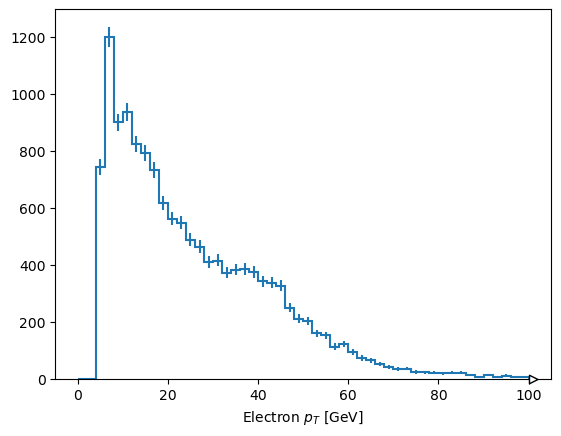

In [38]:
import json
import matplotlib.pyplot as plt
from hist import Hist

dataset = json.load(open("data/SMHiggsToZZTo4L.json"))

pts = [el["pt"] for ev in dataset for el in ev["electron"]]

h = Hist.new.Reg(50, 0, 100, name="Electron $p_T$ [GeV]").Double()
h.fill(pts)
h.plot1d()
plt.show()